A double in rows 21 and 56 has been found.

Enter a value for x: -1
Enter a value for y: 2

Nearest Neighbours:
[ 0.5  2.1  0. ]
[ 0.8  1.8  0. ]
[ 0.8  1.6  0. ]

The object is of class 0.


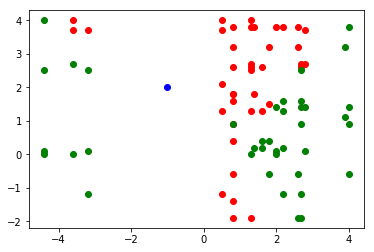

In [10]:
from numpy import loadtxt
data = loadtxt("nn.csv", skiprows=1, delimiter=",") #Importing data file
rows = data.shape[0] #Counting the number of rows

width = 3

matrix = [[0 for x in range(width)] for y in range(rows)]

#Storing the data from the spreadsheet in a multidimensional array
for n in range(rows):
    matrix[n] = data[n]  
    
#Checking the data for doubles and identifying them if they exist    
for n in range(rows):    
    i = n + 1
    while i < rows:
        if matrix[n][0] == matrix[i][0] and matrix[n][1] == matrix[i][1] and matrix[n][2] == matrix[i][2]:
            del matrix[n]
            rows = rows - 1
            print("A double in rows " + str(n) + " and " + str(i) + " has been found.")
        i = i + 1

#Taking user input for point to be classified
print("")
x = eval(input("Enter a value for x: ")) 
y = eval(input("Enter a value for y: "))

#Variables used to identify 3 nearest neighbours
neighbour1 = 100
neighbour2 = 100
neighbour3 = 100
n1 = 0
n2 = 0
n3 = 0

#Evaluating the distance between user point and each sample point and selecting the 3 closest
for n in range(rows):
    dist = ((x-matrix[n][0])**2 + (y-matrix[n][1])**2)**(1/2)
    if dist < neighbour1:
        neighbour1 = dist
        n1 = n
    elif dist < neighbour2:
        neighbour2 = dist
        n2 = n
    elif dist < neighbour3:
        neighbour3 = dist
        n3 = n

neighbours = [n1,n2,n3]
cnt0 = 0
cnt1 = 0

print("")
print("Nearest Neighbours:")
for n in range(3):
    print(matrix[neighbours[n]])

#Counting the "votes"    
for n in range(3):
    if matrix[neighbours[n]][2] == 0:
        cnt0 = cnt0 + 1
    else:
        cnt1 = cnt1 + 1

#Selecting the class based on the majority vote  
print("")
if cnt0 > cnt1:
    print("The object is of class 0.")
else:
    print("The object is of class 1.")
 
x0 = []
x1 = []
for n in range(rows):
    if data[n][2] == 0:
        x0.append(data[n][0])
    else:
        x1.append(data[n][0])
y0 = []
y1 = []
for n in range(rows):
    if data[n][2] == 0:
        y0.append(data[n][1])
    else:
        y1.append(data[n][1])

import pylab as pl
pl.plot(x0,y0,'ro')
pl.plot(x1,y1,'go')
pl.plot(x,y,'bo')
pl.show()